In [1]:
import pandas as pd

In [65]:
def create_paper_venue_file():
    paper_venue_citations = pd.read_csv('data/paper_venue_citations.csv', delimiter='\t')

    part1 = paper_venue_citations[['paper1', 'venue1']].drop_duplicates()

    part2 = paper_venue_citations[['paper2', 'venue2']].drop_duplicates()

    part2 = part2.rename(axis='columns', mapper={'paper2' :'paper1', 'venue2':'venue1'})

    fixed = part1.append(part2)
    
    fixed.dropna(subset=['venue1'], inplace=True)
    
    fixed = fixed.drop_duplicates()

    fixed.to_csv('derived-data/venue-paper.csv', index=False)
# create_paper_venue_file()

In [ ]:
venue_rankings = pd.read_csv('data/h5_index_rank_quantiles_deciles.tsv', delimiter='\t')
venue_rankings.head()

In [113]:
y2015 = venue_rankings[venue_rankings.year == 2015]
#print(y2015)

print(venue_rankings[venue_rankings.venue.str.contains("web")])
#y2015["h5_index"].plot()

                                                   venue  year  h5_index  \
52              international world wide web conferences  2018        59   
129                           web search and data mining  2018        41   
160                international semantic web conference  2018        36   
189    international conference on weblogs and social...  2018        33   
289                     european semantic web conference  2018        27   
304                                       world wide web  2018        27   
441                             journal of web semantics  2018        21   
490             international conference on web services  2018        20   
701                          acm transactions on the web  2018        15   
743          international conference on web engineering  2018        15   
773                  web information systems engineering  2018        15   
774                                     web intelligence  2018        15   
862         

In [31]:
paper_venue = pd.read_csv('derived-data/venue-paper.csv')
paper_venue.head()

,paper1,venue1
0,16870052-7e2e-4bbc-beeb-21e493bea221,acm journal on computing and cultural heritage
1,ae0b4e3d-305d-4fb8-9847-60dcc9a9ec44,neurocomputing
2,6d6b0e6a-ddc6-40c9-8103-f0b31a686a76,international conference on the theory and app...
3,5d737e23-223d-4a51-8145-301588febcb1,future generation computer systems
4,4167bbcb-4ce3-4df0-9822-67d4ef340c09,international conference on conceptual structures


In [67]:
paper_venue = paper_venue.drop_duplicates()

In [54]:
authorPublicationData = pd.read_csv('derived-data/author-publications.csv')
authorPublicationData = authorPublicationData[['pub_id', 'year']]
authorPublicationData = authorPublicationData.drop_duplicates(subset='pub_id')
authorPublicationData.head()

,pub_id,year
0,001c58d3-26ad-46b3-ab3a-c1e557d16821,2011
2,001c8744-73c4-4b04-9364-22d31a10dbf1,2009
6,00338203-9eb3-40c5-9f31-cbac73a519ec,2011
11,0040b022-1472-4f70-a753-74832df65266,1998
13,005ce28f-ed77-4e97-afdc-a296137186a1,2009


In [55]:
authorPublicationData.shape

(3078230, 2)

In [73]:
publication_venues = authorPublicationData.merge(paper_venue, left_on='pub_id', right_on='paper1', how='inner')
publication_venues = publication_venues.drop('paper1', axis='columns')
publication_venues = publication_venues.rename({"venue1": "venue"}, axis='columns')

In [79]:
print(publication_venues.shape)
publication_venues.head()

(2329853, 3)


,pub_id,year,venue
0,001c58d3-26ad-46b3-ab3a-c1e557d16821,2011,visual analytics science and technology
1,001c8744-73c4-4b04-9364-22d31a10dbf1,2009,pattern recognition and machine intelligence
2,00701b05-684f-45f9-b281-425abfec482c,2011,international symposium on computer and inform...
3,00964544-cbe2-4da9-bb5a-03333160eb34,2014,international conference on computer vision an...
4,00bcf2d5-1592-46b0-81fd-933f90b5ecca,2002,international conference on conceptual structures


In [83]:
publication_venues_rank = publication_venues.merge(venue_rankings, on=['venue', 'year'], how='left')

In [84]:
publication_venues_rank.head()


,pub_id,year,venue,h5_index,ranking,deciles,quantiles
0,001c58d3-26ad-46b3-ab3a-c1e557d16821,2011,visual analytics science and technology,62.0,277.5,2.0,1.0
1,001c8744-73c4-4b04-9364-22d31a10dbf1,2009,pattern recognition and machine intelligence,24.0,1158.5,6.0,3.0
2,00701b05-684f-45f9-b281-425abfec482c,2011,international symposium on computer and inform...,19.0,1461.0,7.0,3.0
3,00964544-cbe2-4da9-bb5a-03333160eb34,2014,international conference on computer vision an...,9.0,2076.5,8.0,4.0
4,00bcf2d5-1592-46b0-81fd-933f90b5ecca,2002,international conference on conceptual structures,45.0,267.5,2.0,1.0


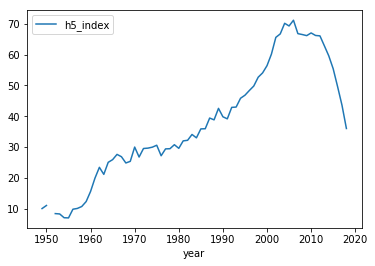

In [112]:
publication_venues_rank["h5_index"].max
publication_venues_rank[["h5_index", "year"]].groupby("year").mean().plot()




In [85]:
publication_venues_rank.to_csv('derived-data/publication-venues-rank.csv', index=False)